In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import data set fom Kagglehub [Phishing Email Dataset](https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset/data)

In [ ]:
import kagglehub
path = kagglehub.dataset_download("naserabdullahalam/phishing-email-dataset")
print(f"Dataset downloaded to: {path}")


100%|██████████| 77.1M/77.1M [00:01<00:00, 78.8MB/s]

Extracting files...


Dataset downloaded to: /home/codespace/.cache/kagglehub/datasets/naserabdullahalam/phishing-email-dataset/versions/1


In [27]:
# Load the dataset and combine them
df1 = pd.read_csv(path + "/CEAS_08.csv")
df2 = pd.read_csv(path + "/Nazario.csv")
df3 = pd.read_csv(path + "/Nigerian_Fraud.csv")
df4 = pd.read_csv(path + "/SpamAssasin.csv")
df5 = pd.read_csv(path + "/Enron.csv")
df6 = pd.read_csv(path + "/Ling.csv")
df7 = pd.read_csv(path + "/phishing_email.csv")
print("Data loaded successfully.")

# Reformat the datasets to have consistent columns and combine them
df_group1 = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_group1['text'] = df_group1['subject'].fillna('') + ' ' + df_group1['body'].fillna('')
df_group1 = df_group1[['text', 'label']]
# Display the first few rows of the combined DataFrame



# Rename columns for consistency
for df_temp in [df5, df6]:
    df_temp['text'] = df_temp['subject'].fillna('') + ' ' + df_temp['body'].fillna('')
df5 = df5[['text', 'label']]
df6 = df6[['text', 'label']]

df7.rename(columns={'text_combined': 'text'}, inplace=True)

df = pd.concat([df_group1, df5, df6, df7], ignore_index=True)
df.head()
print(f"Dataset shape before cleaning: {df.shape}")



Data loaded successfully.
Dataset shape before cleaning: (164972, 2)


In [28]:
# remove rows with missing values
df.dropna(inplace=True)

# remove duplicate rows
df.drop_duplicates(inplace=True)

# reset index after dropping rows
df.reset_index(drop=True, inplace=True)

print(f"Dataset shape after cleaning: {df.shape}")



Dataset shape after cleaning: (164552, 2)


Class distribution:


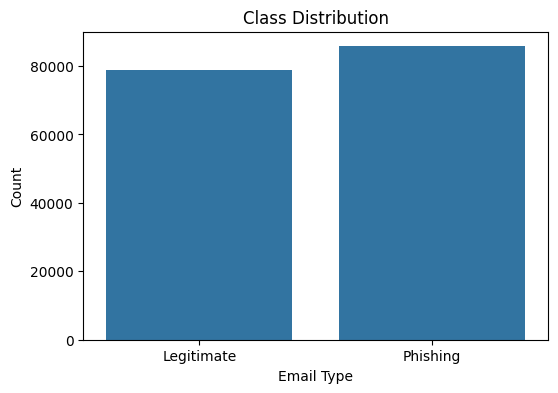

In [33]:
# Visualize the class distribution
print("Class distribution:")
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xticks([0,1], ['Legitimate', 'Phishing'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

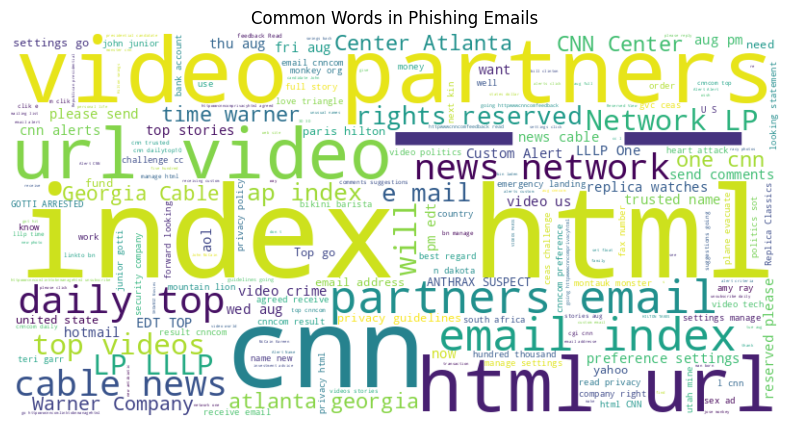

In [32]:
from wordcloud import WordCloud, STOPWORDS

# For phishing emails
phishing_text = ' '.join(df[df['label']==1]['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(phishing_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Phishing Emails')
plt.show()

## References:
- Al-Subaiey, A., Al-Thani, M., Alam, N. A., Antora, K. F., Khandakar, A., & Zaman, S. A. U. (2024, May 19). Novel Interpretable and Robust Web-based AI Platform for Phishing Email Detection. ArXiv.org. https://arxiv.org/abs/2405.11619*